<a href="https://colab.research.google.com/github/kanakdas123/Computer-Vision-Advanced/blob/master/Stock_price_forecasting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from numpy.random import randn
plt.style.use("seaborn")
import pandas_datareader.data as web
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

In [ ]:
start = datetime(2008, 8, 1)
# end is current expiry date
end = datetime.now()

In [ ]:
df = web.DataReader('^NSEI', 'yahoo', start, end)
df.dropna(inplace=True)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df=pd.read_csv('AAPL.csv')
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2933,2020-08-13,11359.299805,11269.950195,11334.849609,11300.450195,562400.0,11300.450195
2934,2020-08-14,11366.250000,11111.450195,11353.299805,11178.400391,645100.0,11178.400391
2935,2020-08-17,11267.099609,11144.500000,11248.900391,11247.099609,634000.0,11247.099609
2936,2020-08-18,11401.700195,11253.150391,11259.799805,11385.349609,579200.0,11385.349609
2937,2020-08-19,11460.349609,11419.700195,11452.150391,11432.799805,0.0,11432.799805


In [ ]:
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

df.head()

,Close
Date,
2016-07-22,8541.200195
2016-07-25,8635.650391
2016-07-26,8590.650391
2016-07-27,8615.799805
2016-07-28,8666.299805


In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns =df.columns, index=df.index)
df.head()

,Close
Date,
2016-07-22,0.195905
2016-07-25,0.215781
2016-07-26,0.206311
2016-07-27,0.211603
2016-07-28,0.222230


done


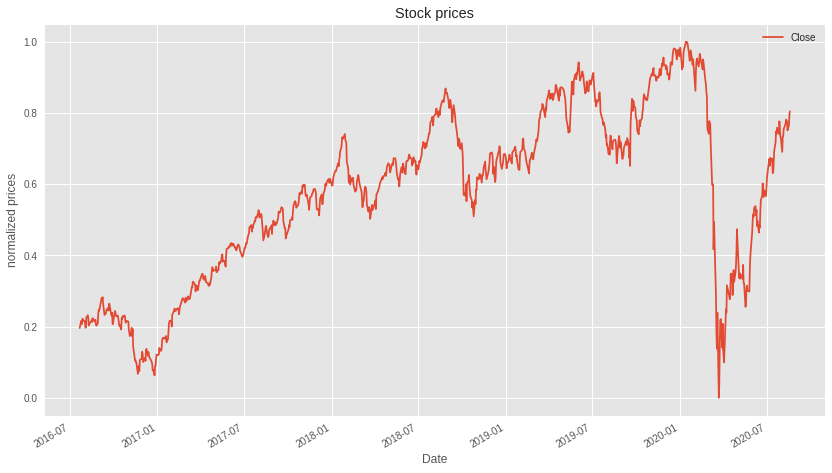

In [ ]:
print('done')
df.plot(figsize=(14,8))
plt.title('Stock prices')
plt.ylabel('normalized prices')
plt.show()

In [ ]:
def split_sequences(seq, n_steps_in, n_steps_out):
    X,y =[], []
    
    for i in range(len(seq)):
        end = i+n_steps_in
        out_end = end+ n_steps_out
        
        if out_end >len(seq):
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [ ]:
def visualize_results(results):
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss','loss'])
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy','accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [ ]:
n_per_in = 30
n_per_out = 10

n_features = 1

X,y = split_sequences(list(df.Close), n_per_in,n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)
print(y.shape)

(961, 30)
(961, 30, 1)
(961, 10)


In [ ]:
model = Sequential()
model.add(LSTM(50, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(50, activation='softsign', return_sequences=True))
model.add(LSTM(50, activation='softsign', return_sequences=True))
model.add(LSTM(50, activation='softsign', return_sequences=True))
model.add(LSTM(50, activation='softsign', return_sequences=True))
model.add(LSTM(50, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 50)            20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

In [ ]:
res = model.fit(X,y, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
27/27 [==============================] - 5s 171ms/step - loss: 0.1769 - accuracy: 0.0671 - val_loss: 0.0436 - val_accuracy: 0.3093
Epoch 2/100
27/27 [==============================] - 4s 136ms/step - loss: 0.0524 - accuracy: 0.1227 - val_loss: 0.0523 - val_accuracy: 0.1237
Epoch 3/100
27/27 [==============================] - 4s 137ms/step - loss: 0.0143 - accuracy: 0.0648 - val_loss: 0.0698 - val_accuracy: 0.0825
Epoch 4/100
27/27 [==============================] - 4s 137ms/step - loss: 0.0104 - accuracy: 0.1655 - val_loss: 0.0643 - val_accuracy: 0.0825
Epoch 5/100
27/27 [==============================] - 4s 134ms/step - loss: 0.0100 - accuracy: 0.1458 - val_loss: 0.0659 - val_accuracy: 0.1856
Epoch 6/100
27/27 [==============================] - 4s 136ms/step - loss: 0.0109 - accuracy: 0.1863 - val_loss: 0.0640 - val_accuracy: 0.1237
Epoch 7/100
27/27 [==============================] - 4s 135ms/step - loss: 0.0097 - accuracy: 0.1389 - val_loss: 0.0662 - val_accuracy: 0.1753

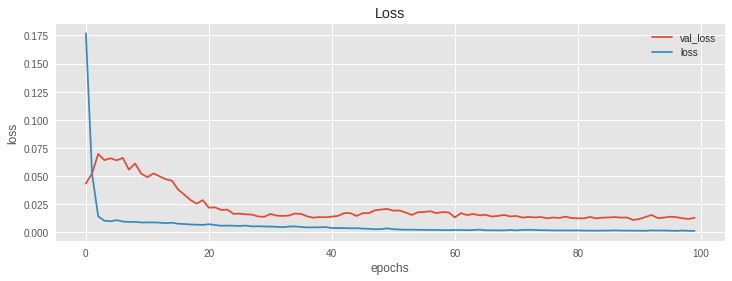

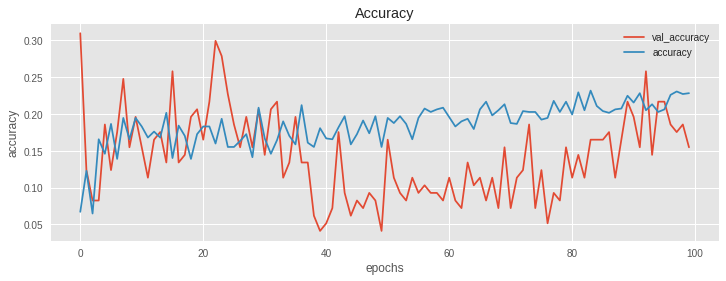

In [ ]:
visualize_results(res)

predicted  [[11117.3399659734], [11093.279217470264], [11096.784648191477], [11114.798415402825], [11098.311617892354], [11083.098286487455], [11040.339169443529], [11023.232067046223], [11021.534867556767], [10987.051580733621]]
actuals  [[11200.150390625], [11214.0498046875], [11270.150390625], [11322.5], [11308.400390625], [11300.450195312502], [11178.400390625], [11247.099609375], [11385.349609375], [11432.7998046875]]


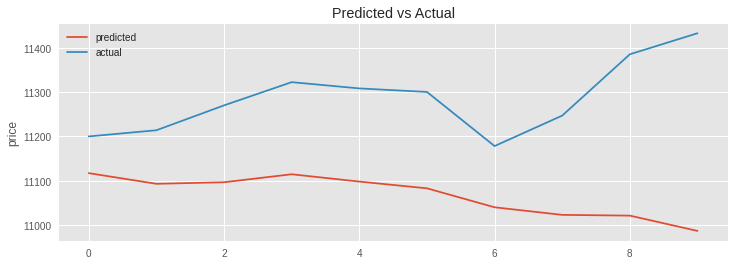

In [ ]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("predicted ", yhat)
plt.plot(yhat, label='predicted')

print("actuals ", actual.tolist())
plt.plot(actual.tolist(), label='actual')

plt.title("Predicted vs Actual")
plt.ylabel('price')
plt.legend()
plt.show()

                   Close
2020-08-19  11399.235964
2020-08-20  11429.632603
2020-08-21  11385.746740
2020-08-22  11410.931119
2020-08-23  11421.505759
2020-08-24  11430.087776
2020-08-25  11420.364002
2020-08-26  11430.776910
2020-08-27  11450.074056
2020-08-28  11436.815960


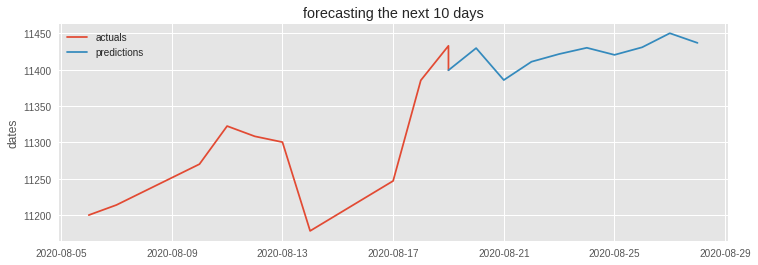

In [ ]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in,n_features)).tolist()[0]
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat),freq="D"), columns=df.columns)

print(preds)

periods = 10

actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)), index = df.Close.tail(periods).index, columns = df.columns).append(preds.head(1))

plt.figure(figsize=(12,4))
plt.plot(actual, label='actuals')
plt.plot(preds, label='predictions')
plt.ylabel("price")
plt.ylabel('dates')
plt.title(f'forecasting the next {len(yhat)} days')
plt.legend()
plt.show()